# Introduction

In this lab you will work with two datasets available from the course repository (https://github.com/nomemm/advstat-labs/tree/master/Lab08). The first dataset (DS-1) contains assessments
of 40 objects. The second dataset (DS-2) contains a time series: registration of bugs in a software
system. The outcome of the lab is fork of the repository with solutions (a python notebook) and
a report (a PDF file) that includes short description of your work along with answers to questions
from assignments.


# Assignment 1
The first dataset (DS-1) contains assessments of 40 objects. The first column is ‘id’. Attributes
p1 − p27 are predictors, attributes y1 − y5 are targets labels.
For each target label yi (using bootstrap) estimate mean, median and find an error of your
estimation.
For each target label yi estimate a linear model for better prediction of yi
. Then (using bootstrap)
find the 95%-confidence intervals for each coefficient of each model including an intercept.

In [3]:
import pandas as pd
import numpy as np
import random
import math
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
ds1 = pd.read_csv('ds-boot-2.csv', delimiter='\t', index_col='id')
ds1.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p24,p25,p26,p27,p28,y1,y2,y3,y4,y5
id,,,,,,,,,,,,,,,,,,,,,
11,6.48148,3.0,5.0,7.75000,0.0,7.16667,8.16667,9.66667,6.16667,9.0,...,1.66667,3.16667,0.0,0.00000,0.0,1.0,5.00,7.44,1.18,4.38
12,5.74074,4.0,8.0,7.33333,8.0,8.83333,9.75000,9.66667,9.00000,10.0,...,2.50000,5.50000,5.0,8.66667,8.0,4.5,4.25,8.93,2.00,6.03
25,7.59259,7.0,8.0,7.66667,8.0,9.66667,9.50000,6.16667,9.66667,6.5,...,3.50000,3.50000,9.0,6.50000,7.0,7.5,11.00,8.97,2.00,9.12
31,5.96297,4.0,8.0,9.33333,10.0,9.33333,7.00000,8.50000,9.66667,6.5,...,0.00000,0.00000,0.0,0.00000,0.0,4.0,6.25,8.93,1.82,6.41
48,5.44444,1.0,3.5,6.41667,9.0,8.50000,7.08333,6.33333,9.00000,7.0,...,0.00000,0.00000,0.0,0.00000,0.0,0.0,3.00,8.08,1.36,3.67


In [3]:
ds1.describe()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p24,p25,p26,p27,p28,y1,y2,y3,y4,y5
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,6.264353,4.812500,6.106250,6.854167,6.537500,6.825000,6.768750,6.262501,6.516668,6.262500,...,3.187500,3.722917,3.483333,3.916667,3.254167,4.025000,5.506250,7.306000,1.527500,5.634750
std,3.168813,4.028246,3.210004,3.105559,3.114045,3.249140,3.144689,3.002584,3.585902,3.285531,...,3.964980,4.055499,4.192620,4.339287,4.256550,2.857626,3.419161,2.956749,0.700848,2.811536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.458337,0.000000,4.375000,6.541665,6.000000,6.249998,6.374998,5.916667,5.375000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,7.277500,1.427500,4.155000
50%,6.666670,4.000000,7.500000,7.666670,7.000000,8.000000,7.833335,7.000000,8.000000,7.000000,...,1.333335,3.333335,0.000000,1.708335,0.000000,4.000000,6.250000,8.215000,1.865000,6.225000
75%,8.726850,9.125000,8.500000,8.687503,9.000000,9.000000,8.812500,8.125000,9.000000,8.625000,...,6.041667,6.625000,7.250002,8.541667,7.625000,6.500000,8.312500,9.072500,2.000000,8.025000
max,10.000000,10.000000,10.000000,9.750000,10.000000,10.000000,10.000000,9.666670,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.000000,9.720000,2.000000,9.490000


Create samples IDs

In [4]:
np.random.seed(13)
B = 1000

indexes = list(ds1.index.values)
n = len(indexes)

#create bootstrap samples IDs
boot_ids = np.random.choice(indexes, (n, B), replace=True)

Compute mean and median for one sample

In [5]:
print('means of the first sample')
print(ds1.loc[boot_ids[:, 0], 'y1':'y5'].mean())
print('medians of the first sample')
print(ds1.loc[boot_ids[:, 0], 'y1':'y5'].median())

means of the first sample
y1    5.02500
y2    6.60625
y3    8.51400
y4    1.75000
y5    6.73300
dtype: float64
medians of the first sample
y1    4.50
y2    6.75
y3    8.93
y4    2.00
y5    6.37
dtype: float64


In [6]:
y_boot_stat = pd.DataFrame(columns=['y1_mean', 'y2_mean', 'y3_mean', 'y4_mean', 'y5_mean', 
                                    'y1_median', 'y2_median', 'y3_median', 'y4_median', 'y5_median'])

for i in range(0, B):
    temp = ds1.loc[boot_ids[:, i], 'y1':'y5']
    y_boot_stat.loc[i, 'y1_mean':'y5_mean'] = list(temp.mean(axis=0))
    y_boot_stat.loc[i, 'y1_median':'y5_median'] = list(temp.median(axis=0))
y_boot_stat.head()


,y1_mean,y2_mean,y3_mean,y4_mean,y5_mean,y1_median,y2_median,y3_median,y4_median,y5_median
0,5.025,6.60625,8.514,1.75,6.733,4.5,6.75,8.93,2,6.37
1,3.4,4.45625,6.69,1.42975,4.89125,3,4.625,8.08,1.82,5.215
2,3.575,4.9625,7.36675,1.5935,5.34875,4,5.5,8.31,1.82,6.015
3,5.0125,6.80625,8.10375,1.6575,6.6415,5.25,7.5,8.93,1.865,7.005
4,4.5875,6.01875,7.1165,1.459,5.91175,4,7,8.05,1.865,6.27


In [7]:
bootstrap_mean = y_boot_stat.loc[:,'y1_mean':'y5_mean'].mean()
bootstrap_mean_se = y_boot_stat.loc[:,'y1_mean':'y5_mean'].std() / math.sqrt(B)
print('Bootstrap mean estimation:')
print(bootstrap_mean)
print('Standard error:')
print(bootstrap_mean_se)
bootstrap_median = y_boot_stat.loc[:,'y1_median':'y5_median'].median()
bootstrap_median_se = y_boot_stat.loc[:,'y1_median':'y5_median'].std() / math.sqrt(B)
print('Bootstrap median estimation:')
print(bootstrap_median)
print('Standard error:')
print(bootstrap_median_se)

Bootstrap mean estimation:
y1_mean    4.024788
y2_mean    5.510344
y3_mean    7.297238
y4_mean    1.526118
y5_mean    5.632946
dtype: float64
Standard error:
y1_mean    0.014180
y2_mean    0.016927
y3_mean    0.014576
y4_mean    0.003471
y5_mean    0.013844
dtype: float64
Bootstrap median estimation:
y1_median    4.000
y2_median    6.250
y3_median    8.215
y4_median    1.865
y5_median    6.225
dtype: float64
Standard error:
y1_median    0.018645
y2_median    0.021684
y3_median    0.008760
y4_median    0.004223
y5_median    0.014290
dtype: float64


In [8]:
train_size = int(round(0.7 * len(indexes)))
print('Train size')
print(train_size)
np.random.shuffle(indexes)
train_ind = indexes[:train_size]
print('Train indexes')
print(train_ind)
test_ind = indexes[train_size:]
print('Test indexes')
print(test_ind)

Train size
28
Train indexes
[276, 563, 210, 12, 564, 580, 610, 445, 415, 623, 478, 535, 473, 633, 48, 616, 566, 365, 155, 320, 559, 31, 193, 283, 502, 101, 316, 635]
Test indexes
[380, 638, 337, 151, 539, 428, 414, 11, 603, 177, 25, 321]


In [9]:
ds1_train = ds1.loc[train_ind, :]
ds1_test = ds1.loc[test_ind, :]
ds1_train.describe()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p24,p25,p26,p27,p28,y1,y2,y3,y4,y5
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,6.146826,4.946429,6.026786,6.931548,6.672620,7.119047,6.907739,6.601191,6.958335,6.125000,...,3.488095,4.285714,3.666667,4.372024,3.648810,3.910714,5.267857,7.418571,1.545714,5.561429
std,3.123505,3.954227,3.206142,3.108717,2.766452,2.958512,3.104022,2.893991,3.250080,3.351686,...,4.079692,4.234839,4.342583,4.532546,4.402894,2.624858,3.189921,2.813196,0.693918,2.617973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.333330,0.750000,4.250000,6.541665,6.000000,6.249998,6.708333,6.166670,6.124998,4.875000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,7.277500,1.427500,4.155000
50%,6.666670,4.000000,7.000000,8.000000,7.000000,8.000000,7.958335,7.333335,8.333335,7.000000,...,2.166670,4.000000,0.000000,2.875000,0.000000,4.000000,5.750000,8.290000,1.865000,6.080000
75%,8.064820,9.625000,8.125000,8.833333,9.000000,9.000000,8.687503,8.541667,9.000000,8.250000,...,6.875002,9.125000,7.625000,10.000000,8.041667,6.125000,8.000000,9.085000,2.000000,7.990000
max,10.000000,10.000000,10.000000,9.750000,10.000000,10.000000,10.000000,9.666670,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.250000,9.690000,2.000000,9.490000


In [10]:
y1_predictor = linear_model.LinearRegression()
y1_predictor.fit(ds1_train.loc[:,'p1':'p28'], ds1_train['y1'])
y2_predictor = linear_model.LinearRegression()
y2_predictor.fit(ds1_train.loc[:,'p1':'p28'], ds1_train['y2'])
y3_predictor = linear_model.LinearRegression()
y3_predictor.fit(ds1_train.loc[:,'p1':'p28'], ds1_train['y3'])
y4_predictor = linear_model.LinearRegression()
y4_predictor.fit(ds1_train.loc[:,'p1':'p28'], ds1_train['y4'])
y5_predictor = linear_model.LinearRegression()
y5_predictor.fit(ds1_train.loc[:,'p1':'p28'], ds1_train['y5'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print('y1 predictor coefficients')
print(y1_predictor.coef_)
print(y1_predictor.intercept_)
print('y2 predictor coefficients')
print(y2_predictor.coef_)
print(y2_predictor.intercept_)
print('y3 predictor coefficients')
print(y3_predictor.coef_)
print(y3_predictor.intercept_)
print('y4 predictor coefficients')
print(y4_predictor.coef_)
print(y4_predictor.intercept_)
print('y5 predictor coefficients')
print(y5_predictor.coef_)
print(y5_predictor.intercept_)

y1 predictor coefficients
[-0.09340253  0.1102464   0.19362925  1.54981378 -0.06327874  0.08960922
 -0.11145146 -0.3363921  -0.81551964 -0.23265623  0.77378317 -0.09994491
  0.29981484 -0.13739989 -0.67851657 -0.01225439  0.1266063   0.0968796
 -0.18388406 -0.23375601  0.36191644 -0.24075766  0.22209755 -0.29096707
  0.47190472  0.38345012 -0.14723105 -0.19854133]
3.10862446895e-15
y2 predictor coefficients
[-0.4757162   0.24936997 -0.19182248  1.15540754  0.46462633  0.8249085
  0.20750792 -0.51971925 -0.68076511 -0.33589911  0.52159955 -0.07798971
  0.34915357  0.09321122 -0.96545902  0.13588249  0.07919602  0.13274602
 -0.3123896  -0.31009398  0.59291525  0.04648615 -0.22166981 -0.19923253
  0.52525281  0.76282865 -0.50251902 -0.43555419]
9.7699626167e-15
y3 predictor coefficients
[-0.5499122   0.12648775  0.46262379  0.51307682  0.00617302  0.3780105
  0.49089784 -0.03167718 -0.35058328 -0.14081505  0.09264053  0.09228342
  0.71555687 -0.43082482  0.13833242 -0.30795046 -0.27936814

In [12]:
def estimate_regr_coefficients(data_x, y, B):
    cols = list(data_x.columns)
    cols.insert(0, 'intercept')
    boot_stat = pd.DataFrame(columns=cols)
    #print(boot_stat)
    boot_stat_se = pd.DataFrame(columns=cols)
    coefficients = []
    se = []
    indexes = list(data_x.index.values)
    n = len(indexes)
    
    #bootstrap samples IDs based on data
    boot_ids = np.random.choice(indexes, (n, B), replace=True)
    
    for i in range(0, B):
        temp = data_x.loc[boot_ids[:, i]]
        temp_y = y.loc[boot_ids[:, i]]
        
        ytemp_predictor = linear_model.LinearRegression()
        ytemp_predictor.fit(temp, temp_y)
        #print(boot_stat.loc[i, 1:])
        boot_stat.loc[i, 'intercept'] = ytemp_predictor.intercept_
        #print(boot_stat.columns[1:])
        boot_stat.loc[i, 1:] = ytemp_predictor.coef_
    
    coefficients = boot_stat.mean()
    se = boot_stat.std() / math.sqrt(B)
    for c in range(0, len(coefficients)):
        st = ['coef ', cols[c],'=', str(coefficients[c]),'se: ',str(se[c]), '; confidence interval 95%: (', str(coefficients[c]-1.96*se[c]), ',', str(coefficients[c]+1.96*se[c]), ')']
        print(' '.join(st))
    
    #return coefficients, se

In [14]:
#select B as a not big value because otherwise it will take a lot of computational power
B=100
#create bootstrap samples IDs based on train data
boot_ids = np.random.choice(train_ind, (n, B), replace=True)

estimate_regr_coefficients(ds1_train.loc[:,'p1':'p28'], ds1_train[['y1']], B)

coef  intercept = -0.321524470473 se:  0.153002983795 ; confidence interval 95%: ( -0.621410318712 , -0.0216386222342 )
coef  p1 = 0.247113806349 se:  0.0141160470112 ; confidence interval 95%: ( 0.219446354207 , 0.274781258491 )
coef  p2 = 0.163540759336 se:  0.0162229004551 ; confidence interval 95%: ( 0.131743874444 , 0.195337644228 )
coef  p3 = 0.0636658190419 se:  0.0172337848606 ; confidence interval 95%: ( 0.029887600715 , 0.0974440373688 )
coef  p4 = 0.339659861541 se:  0.0173645205919 ; confidence interval 95%: ( 0.305625401181 , 0.373694321902 )
coef  p5 = -0.106556359221 se:  0.0138511596052 ; confidence interval 95%: ( -0.133704632047 , -0.0794080863948 )
coef  p6 = -0.109226693963 se:  0.0132259148299 ; confidence interval 95%: ( -0.135149487029 , -0.083303900896 )
coef  p7 = 0.0187435468561 se:  0.0155369421475 ; confidence interval 95%: ( -0.0117088597531 , 0.0491959534653 )
coef  p8 = 0.0662349158383 se:  0.0136047616624 ; confidence interval 95%: ( 0.0395695829801 , 0.

In [15]:
estimate_regr_coefficients(ds1_train.loc[:,'p1':'p28'], ds1_train[['y2']], B)

coef  intercept = -0.123102427018 se:  0.0839258677011 ; confidence interval 95%: ( -0.287597127712 , 0.0413922736758 )
coef  p1 = 0.0834206808429 se:  0.0118605504271 ; confidence interval 95%: ( 0.0601740020058 , 0.10666735968 )
coef  p2 = 0.348205488581 se:  0.0106069718461 ; confidence interval 95%: ( 0.327415823763 , 0.368995153399 )
coef  p3 = -0.0187398520786 se:  0.0139662149485 ; confidence interval 95%: ( -0.0461136333777 , 0.00863392922042 )
coef  p4 = 0.135143975077 se:  0.0119112160535 ; confidence interval 95%: ( 0.111797991612 , 0.158489958542 )
coef  p5 = -0.055598149023 se:  0.0115657419656 ; confidence interval 95%: ( -0.0782670032756 , -0.0329292947705 )
coef  p6 = 0.0501862643216 se:  0.0110837838884 ; confidence interval 95%: ( 0.0284620479003 , 0.0719104807429 )
coef  p7 = 0.121567384152 se:  0.014194268854 ; confidence interval 95%: ( 0.0937466171981 , 0.149388151106 )
coef  p8 = 0.000289795124598 se:  0.0112311411001 ; confidence interval 95%: ( -0.0217232414316

In [16]:
estimate_regr_coefficients(ds1_train.loc[:,'p1':'p28'], ds1_train[['y3']], B)

coef  intercept = 0.0523544976857 se:  0.0370943971607 ; confidence interval 95%: ( -0.0203505207492 , 0.125059516121 )
coef  p1 = 0.0498554348219 se:  0.00413754708386 ; confidence interval 95%: ( 0.0417458425376 , 0.0579650271063 )
coef  p2 = 0.0192620664775 se:  0.0028654846865 ; confidence interval 95%: ( 0.013645716492 , 0.0248784164631 )
coef  p3 = 0.0404732945216 se:  0.00397653338786 ; confidence interval 95%: ( 0.0326792890814 , 0.0482672999618 )
coef  p4 = 0.0531504335305 se:  0.00371255254136 ; confidence interval 95%: ( 0.0458738305494 , 0.0604270365116 )
coef  p5 = 0.0544475295943 se:  0.00382951982066 ; confidence interval 95%: ( 0.0469416707458 , 0.0619533884428 )
coef  p6 = 0.08214786359 se:  0.00323287142357 ; confidence interval 95%: ( 0.0758114355998 , 0.0884842915802 )
coef  p7 = 0.0894146170535 se:  0.00448678568103 ; confidence interval 95%: ( 0.0806205171187 , 0.0982087169884 )
coef  p8 = 0.106416223227 se:  0.00408386022407 ; confidence interval 95%: ( 0.0984118

In [17]:
estimate_regr_coefficients(ds1_train.loc[:,'p1':'p28'], ds1_train[['y4']], B)

coef  intercept = 0.0330333716831 se:  0.0168693707911 ; confidence interval 95%: ( -3.05950674662e-05 , 0.0660973384337 )
coef  p1 = -0.0216895047952 se:  0.00245461515823 ; confidence interval 95%: ( -0.0265005505054 , -0.0168784590851 )
coef  p2 = 0.00781853931654 se:  0.00215802969279 ; confidence interval 95%: ( 0.00358880111867 , 0.0120482775144 )
coef  p3 = 0.0375262057591 se:  0.00261727196757 ; confidence interval 95%: ( 0.0323963527027 , 0.0426560588156 )
coef  p4 = 0.0100167311288 se:  0.00220907527573 ; confidence interval 95%: ( 0.0056869435884 , 0.0143465186692 )
coef  p5 = 0.0333594318529 se:  0.00270632337565 ; confidence interval 95%: ( 0.0280550380366 , 0.0386638256692 )
coef  p6 = 0.0350731375406 se:  0.00222539582826 ; confidence interval 95%: ( 0.0307113617172 , 0.039434913364 )
coef  p7 = -0.0185152584248 se:  0.0024615883922 ; confidence interval 95%: ( -0.0233399716735 , -0.013690545176 )
coef  p8 = 0.0258504148166 se:  0.00236153434831 ; confidence interval 95%

In [18]:
estimate_regr_coefficients(ds1_train.loc[:,'p1':'p28'], ds1_train[['y5']], B)

coef  intercept = -0.00046772081398 se:  0.000467720813989 ; confidence interval 95%: ( -0.0013844536094 , 0.000449011981439 )
coef  p1 = 0.122933050754 se:  0.0075338940525 ; confidence interval 95%: ( 0.108166618411 , 0.137699483096 )
coef  p2 = 0.18248506235 se:  0.00761265359037 ; confidence interval 95%: ( 0.167564261313 , 0.197405863388 )
coef  p3 = 0.0308512164313 se:  0.00842359828354 ; confidence interval 95%: ( 0.0143409637956 , 0.0473614690671 )
coef  p4 = 0.181264759876 se:  0.00777303262245 ; confidence interval 95%: ( 0.166029615936 , 0.196499903816 )
coef  p5 = -0.0348471720663 se:  0.00740277048503 ; confidence interval 95%: ( -0.0493566022169 , -0.0203377419156 )
coef  p6 = 0.00368581800849 se:  0.00682118781859 ; confidence interval 95%: ( -0.00968371011595 , 0.0170553461329 )
coef  p7 = 0.0576346213716 se:  0.0070841818219 ; confidence interval 95%: ( 0.0437496250007 , 0.0715196177425 )
coef  p8 = 0.0632574328021 se:  0.00700151558752 ; confidence interval 95%: ( 0.0

# Assignment 2

The second dataset (DS-2) contains a time series: registration of bugs in a software system. Determine
the best model for the mean number of bugs as a function of time. Using bootstrap, estimate
the 95%-confidence intervals for each of the model parameters.

Hint. Pick one of the S-shaped models from http://www.hpl.hp.com/techreports/tandem/TR-96.1.pdf.

In [4]:
ds2 = pd.read_csv('ds-boot-1.csv', delimiter='\t', index_col='day')
ds2.head()

,bugsPerDay,cummBugs
day,,
1,0,0
2,1,1
3,0,1
4,2,3
5,1,4


In [5]:
ds2.describe()

,bugsPerDay,cummBugs
count,1327.000000,1327.000000
mean,4.212509,2894.581763
std,8.803797,2013.662007
min,0.000000,0.000000
25%,0.000000,765.000000
50%,2.000000,3186.000000
75%,6.000000,4994.500000
max,224.000000,5590.000000


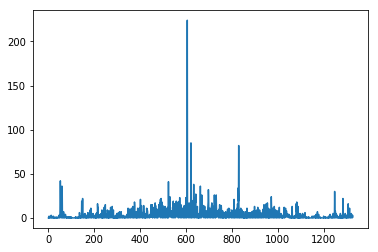

In [6]:
plt.plot(ds2[['bugsPerDay']])
plt.show()

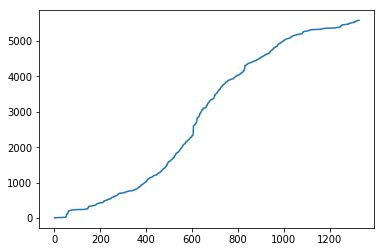

In [7]:
plt.plot(ds2[['cummBugs']])
plt.show()

In [15]:
def goel_oku_s(x,a,b):
    # a>=0, b>0
    return a * (1-(1+b*x)*np.exp(-b*x))

def gompertz_s(x,a,b,c):
    #a>=0, b>0, c>0
    return a*(b**c**x)

def yamada_raleigh_s(x,a,alp,bet):
    return a*(1-np.exp(-alp*(1-np.exp(-bet*x))))

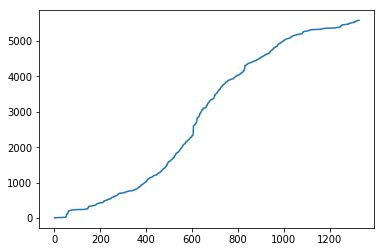

In [16]:
xdata= np.array(ds2.index.values)
ydata=ds2['cummBugs']
plt.plot(xdata, ydata)
plt.show()

c:\anaconda3\envs\statistics-env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
c:\anaconda3\envs\statistics-env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


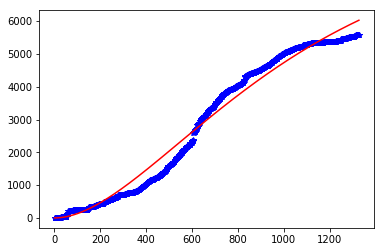

In [17]:
popt, pcov=curve_fit(goel_oku_s, xdata, ydata)
plt.plot(xdata, ydata, 'b*')
plt.plot(xdata, goel_oku_s(xdata, *popt), 'r-', label='fit')
plt.show()

In [18]:
popt, pcov=curve_fit(gompertz_s, xdata, ydata)
plt.plot(xdata, ydata, 'b*')
plt.plot(xdata, gompertz_s(xdata, *popt), 'r-', label='fit')
plt.show()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [19]:
popt, pcov=curve_fit(yamada_raleigh_s, xdata, ydata)
plt.plot(xdata, ydata, 'b*')
plt.plot(xdata, yamada_raleigh_s(xdata, *popt), 'r-', label='fit')
plt.show()

c:\anaconda3\envs\statistics-env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [23]:
B=100
cols = ['a', 'b']
boot_stat = pd.DataFrame(columns=cols)
boot_stat_se = pd.DataFrame(columns=cols)
coefficients = []
se = []
indexes = list(xdata)
n = len(indexes)
    
#bootstrap samples IDs based on data
boot_ids = np.random.choice(indexes, (n, B), replace=True)
    
for i in range(0, B):
    temp = xdata[boot_ids[:, i]]
    temp_y = ydata[boot_ids[:, i]]
    popt, pcov=curve_fit(goel_oku_s, temp, temp_y)
    boot_stat.loc[i, :] = popt
    
coefficients = boot_stat.mean()
se = boot_stat.std() / math.sqrt(B)
for c in range(0, len(coefficients)):
    st = ['coef ', cols[c],'=', str(coefficients[c]),'se: ',str(se[c]), '; confidence interval 95%: (', str(coefficients[c]-1.96*se[c]), ',', str(coefficients[c]+1.96*se[c]), ')']
    print(' '.join(st))

c:\anaconda3\envs\statistics-env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
c:\anaconda3\envs\statistics-env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.